In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a TREE
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [6]:
#import packages
import os
import qiime2 as q2
import seaborn as sns

# import pandas as pd
# import numpy as np
# import dokdo
# import matplotlib.pyplot as plt
# from skbio import DistanceMatrix
# from qiime2 import Metadata

# from qiime2.plugins import demux
# from qiime2.plugins import cutadapt
# from qiime2.plugins import dada2
# from qiime2.plugins import feature_table
# from qiime2.plugins import feature_classifier
# from qiime2.plugins import alignment
from qiime2.plugins import phylogeny
# from qiime2.plugins import diversity

# from qiime2.plugins.metadata.visualizers import tabulate
# from qiime2.plugins.feature_table.methods import transpose
# from qiime2.plugins.taxa.visualizers import barplot
# from qiime2.plugins.feature_table.visualizers import core_features

# from qiime2.plugins.taxa.methods import filter_table
# from qiime2.plugins.taxa.methods import filter_seqs
# from qiime2.plugins.taxa.methods import collapse

In [5]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [5]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [8]:
import qiime2.plugins.phylogeny.actions as phylogeny_actions
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-mu32f64a/41223d24-7226-4f14-9a6e-8eb5480943d5/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-2muz5o0m/f6c599d8-3578-4449-afa1-91b01dcb9a61/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-2muz5o0m/f6c599d8-3578-4449-afa1-91b01dcb9a61/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    400
      0.28 seconds: Joined    300 of    400
Initial topology in 0.34 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.38 seconds: ME NNI round 2 of 35, 301 of 401 splits, 30 changes (max delta 0.154)
      0.52 seconds: SPR round   1 of   2, 101 of 804 nodes
      0.63 seconds: SPR round   1 of   2, 201 of 804 nodes
      0.73 seconds: SPR round   1 of   2, 301 of 804 nodes
      0.94 seconds: SPR round   1 of   2, 501 of 804 nodes
      1.05 seconds: SPR round   1 of   2, 601 of 804 nodes
      1.1

## ALPHA AND BETA DIVERSITY

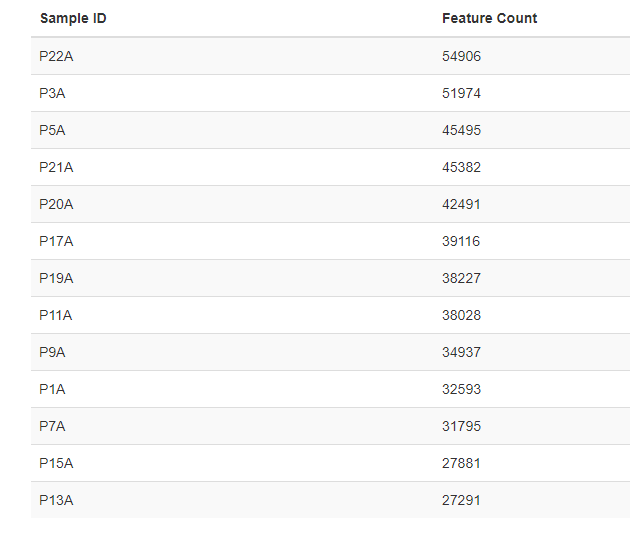

In [ ]:
# choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# this step can take some time
alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
    table = denoisetable_ba,
    max_depth = 40000,
    phylogeny = rooted_tree,
    metrics = {'observed_features'},
    metadata = sample_metadata,
    steps = 1000
)

In [441]:
# save alpha_rarefacion
alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

'./results/alpha_rarefaction_40000.qzv'

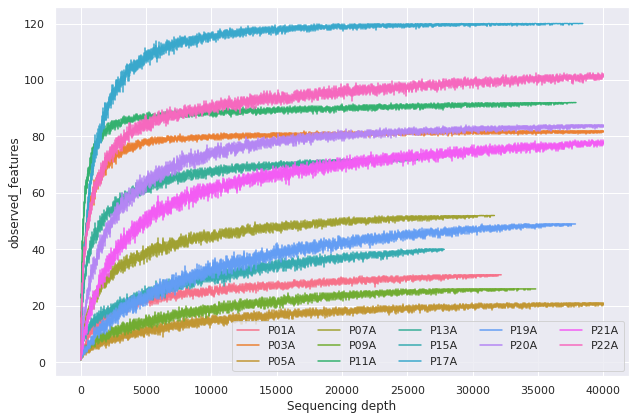

In [447]:
sns.set()
ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
                                  figsize=(9, 6),
                                  metric='observed_features')
ax.legend(ncol=5)
plt.tight_layout()
plt.savefig('.ba_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [60]:
# set sampling_depth based on alpha rarefacation curve
depth = 25000
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba.filtered_table,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00048345976118766134 and the largest is 1.4066447051104805.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-t6x57ksv/14fcc750-5c3c-4d74-8603-c6f11ed38865/data/feature-table.biom -t /tmp/qiime2-archive-cy7pvpy_/7f091408-089e-4b1b-a654-45949b5e7895/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-msbuyr_w

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-t6x57ksv/14fcc750-5c3c-4d74-8603-c6f11ed38865/data/feature-table.biom -t /tmp/qiime2-archive-cy7pvpy_/7f091408-089e-4b1b-a654-45949b5e7895/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-lh2ig99r

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.001970049311838776 and the largest is 0.15717977652493903.
  warn(


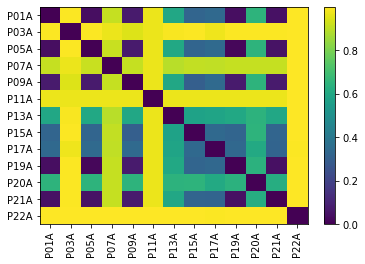

In [61]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

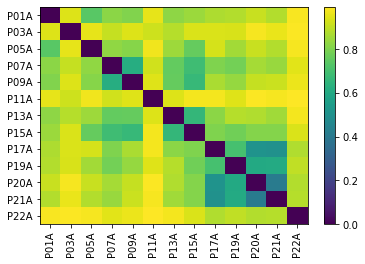

In [62]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [63]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 86da649a-3ae0-414c-92ec-3c371dddd784>

In [64]:
alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
    table = denoisetable_ba.filtered_table,
    phylogeny = rooted_tree,
    max_depth = depth,
    metadata = sample_metadata,
    metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
    steps =  100
)

In [65]:
alpha_rarefaction.visualization

<visualization: Visualization uuid: 0d570abd-98cb-44bc-bfb7-af432f505d6e>

In [66]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson
Sample ID,,,,,
P01A,29.0,3.239768,36.500000,0.336427,0.072817
P03A,82.0,10.552469,83.000000,4.192220,0.878260
P05A,19.0,2.015762,20.200000,0.123232,0.023971
P07A,50.0,5.998545,53.333333,2.278252,0.708517
P09A,26.0,2.865307,26.666667,0.490013,0.138739
P11A,92.0,12.044203,98.000000,5.265229,0.956262
P13A,72.0,9.091277,72.750000,3.296552,0.797092
P15A,38.0,4.394913,39.363636,1.498064,0.499805
P17A,120.0,16.366503,120.250000,2.731095,0.561898


In [67]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [68]:
# simpson viz
visualizations['simpson']

<visualization: Visualization uuid: 617551f7-30fd-4a7f-8483-bfc48ca69fc2>

In [69]:
# observed_features viz
visualizations['observed_features']

<visualization: Visualization uuid: 45692831-07cc-452e-b6b0-ddebd4d2d465>

In [70]:
# fisher_alpha viz
visualizations['fisher_alpha']

<visualization: Visualization uuid: 4db5264c-8df6-4e9a-88c9-e206541d35ac>

In [71]:
# chao1 viz
visualizations['chao1']

<visualization: Visualization uuid: 1f74815a-004d-402d-a04e-4c02c9b3309b>

In [72]:
# shannon viz
visualizations['shannon']

<visualization: Visualization uuid: d9eff091-7f8a-4762-aab0-83961e1c2ac9>

In [73]:
# evenness_vector viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.evenness_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 253b1836-0efe-4663-ad95-a4854ca3cd88>

In [74]:
# faith_pd viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.faith_pd_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: bbe83541-f70e-4897-b0f1-6c5416c9007a>

### BETA DIVERSITY

In [73]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba.filtered_table,
    metadata = sample_metadata,
    where = "[population] IN ('linija reke Ljubljanice', 'črna podvrsta')"
)

In [62]:
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba.filtered_table,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [72]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 25000
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.000519922532497795 and the largest is 1.3251628208776731.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-e49ivyry/73c8c994-3f4b-4e00-9a98-09a4fbdc3378/data/feature-table.biom -t /tmp/qiime2-archive-wyskf3fg/c481daae-2023-4a2d-822a-1b9e49e56c13/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-cvi8de6t

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-e49ivyry/73c8c994-3f4b-4e00-9a98-09a4fbdc3378/data/feature-table.biom -t /tmp/qiime2-archive-wyskf3fg/c481daae-2023-4a2d-822a-1b9e49e56c13/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-8nal34e8

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0018849620444755626 and the largest is 0.15320124348194064.
  warn(


In [65]:
depth = 25000
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00028347326582951277 and the largest is 0.8367462108861153.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-f6dpdxwm/cbb87d74-1971-430b-afd7-22bb1df3551f/data/feature-table.biom -t /tmp/qiime2-archive-wyskf3fg/c481daae-2023-4a2d-822a-1b9e49e56c13/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-amqvjvvn

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-f6dpdxwm/cbb87d74-1971-430b-afd7-22bb1df3551f/data/feature-table.biom -t /tmp/qiime2-archive-wyskf3fg/c481daae-2023-4a2d-822a-1b9e49e56c13/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-p1zqlm30

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0006474973876507851 and the largest is 0.10112462967012029.
  warn(


#### PERMANOVA

In [74]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: 8b1b6fab-4ac3-46e9-aadb-1638416cec48>

<Figure size 432x288 with 0 Axes>

In [75]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: 493514ba-6626-4693-a5ca-7feb5654abbf>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [76]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: dccaa1a9-9c55-49be-a770-49a13d35ab78>

<Figure size 432x288 with 0 Axes>

In [77]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 69ecef0b-7fbb-4c11-a992-30b5765959f4>

<Figure size 432x288 with 0 Axes>

## core microbiome
```
# The analysis reports the ASVs or taxa that occur in all (or a specified fraction of) samples. Note: if a species is present under different ASV numbers, it may be wrongly reported from fewer samples than it actually occurs. So it is better to assign the taxonomy to ASVs
```

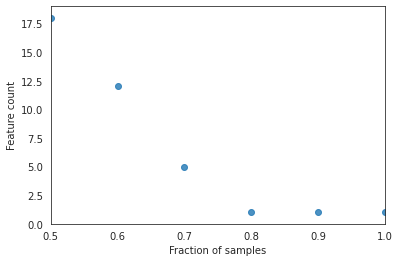

In [78]:
core_microbiome_asv = feature_table.actions.core_features(
    table = denoisetable_ba.filtered_table,
    min_fraction = 0.5,
    steps = 6
)

In [79]:
taxtable ={}

for level in range(2,8):
    result = collapse(
        table = denoisetable_ba.filtered_table,
        taxonomy = taxonomy,
        level = level
    )
    taxtable[level] = result.collapsed_table

In [80]:
taxtable[5].view(pd.DataFrame).T

,P01A,P03A,P05A,P07A,P09A,P11A,P13A,P15A,P17A,P19A,P20A,P21A,P22A
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae,685.0,5340.0,5.0,79.0,8.0,7382.0,46.0,14.0,307.0,11.0,2925.0,45.0,220.0
d__Bacteria;__;__;__;__,367.0,323.0,303.0,244.0,85.0,298.0,169.0,118.0,809.0,317.0,712.0,295.0,212.0
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae,4.0,3334.0,0.0,5.0,6.0,1560.0,107.0,2.0,863.0,2.0,22.0,8.0,0.0
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae,0.0,64.0,0.0,30.0,723.0,2952.0,1.0,4423.0,0.0,0.0,0.0,0.0,174.0
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae,31003.0,293.0,44670.0,2734.0,32339.0,1092.0,10396.0,18898.0,25643.0,37285.0,36486.0,42775.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria;p__Patescibacteria;c__Microgenomatia;o__Candidatus_Amesbacteria;f__Candidatus_Amesbacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Hydrogenophilaceae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
d__Bacteria;p__Myxococcota;c__bacteriap25;o__bacteriap25;f__bacteriap25,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d__Bacteria;p__Planctomycetota;c__vadinHA49;o__vadinHA49;f__vadinHA49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405.0


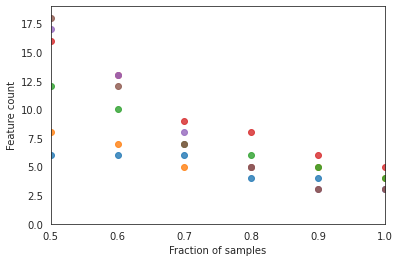

In [81]:
core_microbiome ={}

for level in range(2,8):
    result = core_features(
        table = taxtable[level],
        min_fraction = 0.5,
        steps = 6       
    )
    core_microbiome[level] = result.visualization